In [1]:
# !pip install librosa

#### Imports

In [2]:
import librosa
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import numpy as np

/Users/francescue/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.20.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load sample audio data

In [3]:
ambulance_sound = '../Data/Ambulance data/ambulance112.wav'
road_sound ='../Data/Road Noises/road113.wav'

a , sampling_rate_a = librosa.load(ambulance_sound)
b, sampling_rate_b = librosa.load(road_sound)
print(a.shape, sampling_rate_a)
print(b.shape, sampling_rate_b)


(146765,) 22050
(153318,) 22050


## Ambulance sound

In [4]:
import IPython.display as ipd
ipd.Audio(ambulance_sound)

## Road noises

In [5]:
import IPython.display as ipd
ipd.Audio(road_sound)

### Visualizing Audio:
#### We can plot the audio array using librosa.display.waveplot:

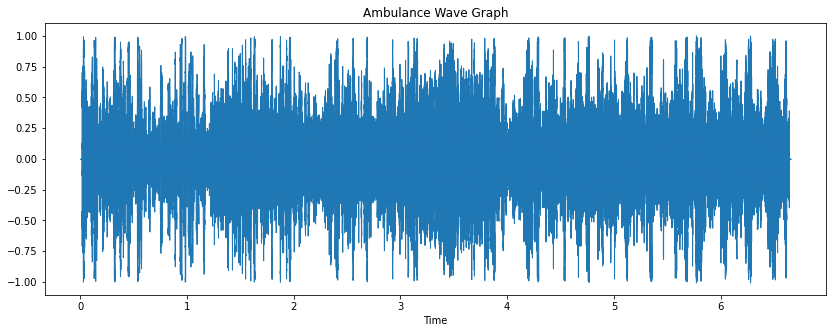

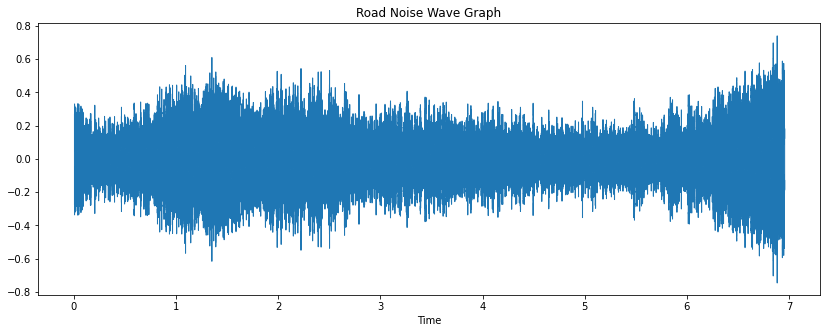

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(a, sr=sampling_rate_a)
plt.title('Ambulance Wave Graph')
plt.show()

%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(b, sr=sampling_rate_b)
plt.title('Road Noise Wave Graph')
plt.show()

### Spectogram

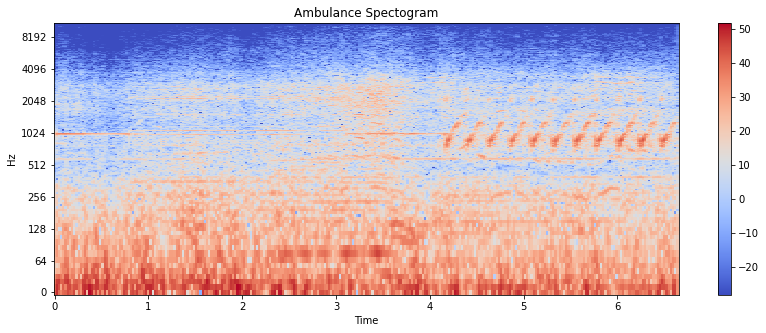

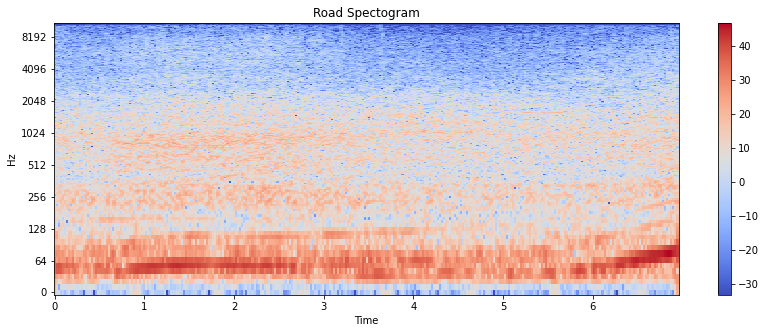

In [7]:
X = librosa.stft(a)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))

# using log Hz for y_axis for better visualization.
librosa.display.specshow(Xdb, sr=sampling_rate_a, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Ambulance Spectogram')
plt.show()

X = librosa.stft(b)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sampling_rate_b, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Road Spectogram')
plt.show()

A spectrogram represents a signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. This helps us visualize the energy levels vary over time. Here we can see that the ambulance signal has pattern occuring at 1024 Hz starting at 4 seconds in, while the road signal is mostly dense at the bottom, around 128Hz and no noticeable pattern. 

### Spectral Rolloff

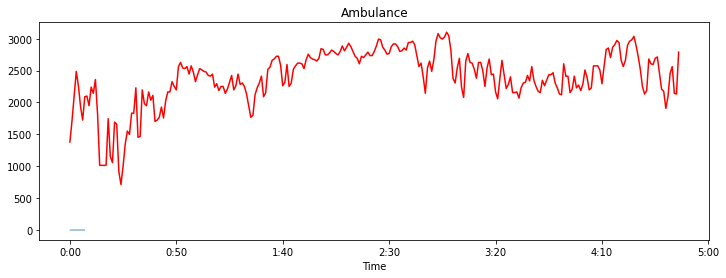

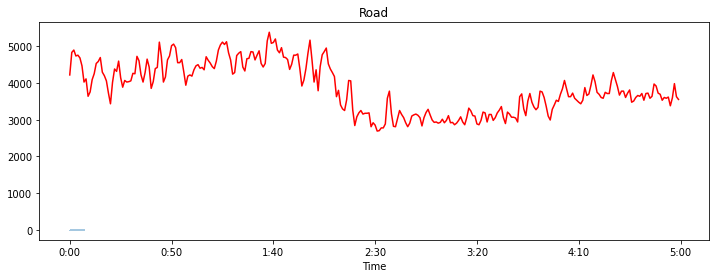

In [8]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=a+0.01, sr=sampling_rate_a)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y=a, sr=sampling_rate_a, alpha=0.4)
plt.plot(spectral_rolloff, color='r')
plt.title('Ambulance')
plt.show()

spectral_rolloff = librosa.feature.spectral_rolloff(y=b+0.01, sr=sampling_rate_b)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y=b, sr=sampling_rate_b, alpha=0.4)
plt.plot(spectral_rolloff, color='r')
plt.title('Road')
plt.show()

### Spectral Centroid

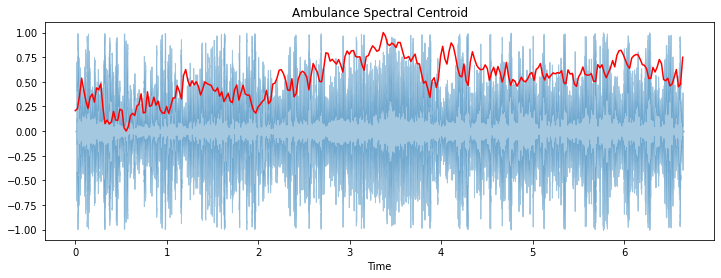

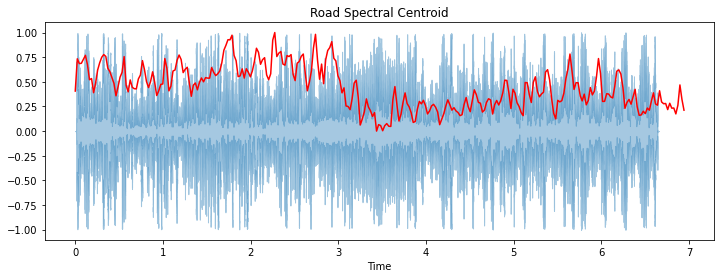

In [9]:

spectral_centroids = librosa.feature.spectral_centroid(y=a, sr=sampling_rate_a)[0]
spectral_centroids.shape

# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(a, sr=sampling_rate_a, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.title('Ambulance Spectral Centroid')
plt.show()


spectral_centroids_r = librosa.feature.spectral_centroid(y=b, sr=sampling_rate_b)[0]
spectral_centroids_r.shape

# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids_r))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(a, sr=sampling_rate_b, alpha=0.4)
plt.plot(t, normalize(spectral_centroids_r), color='r')
plt.title('Road Spectral Centroid')
plt.show()


In [10]:
def find_min_max(array):
    min_value = np.min(array)
    max_value = np.max(array)
    return min_value, max_value

print(f'The range of ambulance spectral centroid is: {find_min_max(spectral_centroids)}')
print(f'The range of road spectral centroid is: {find_min_max(spectral_centroids_r)}')

The range of ambulance spectral centroid is: (373.50196896122065, 1772.686251743412)
The range of road spectral centroid is: (1462.5935208529338, 2233.316945888072)


### Zero Crossing Rate 

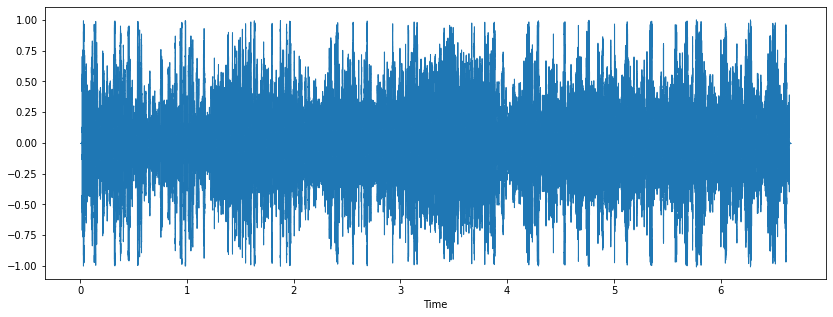

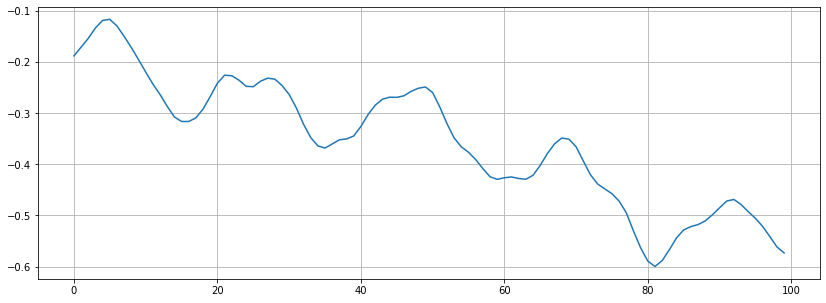

In [11]:
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(a, sr=sampling_rate_a)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(a[n0:n1])
plt.grid()

In [12]:
zero_crossings = librosa.zero_crossings(a[n0:n1], pad=False)
print(sum(zero_crossings))

0


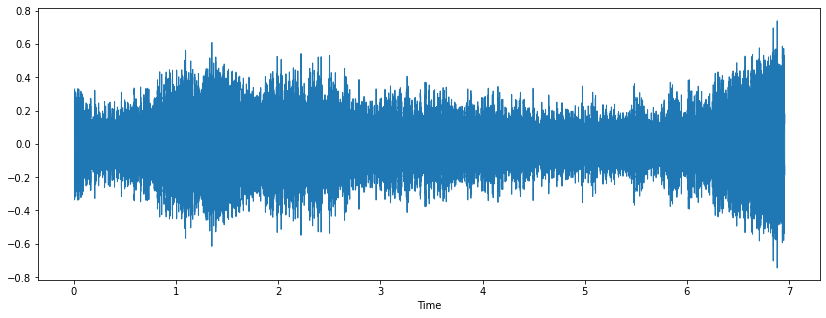

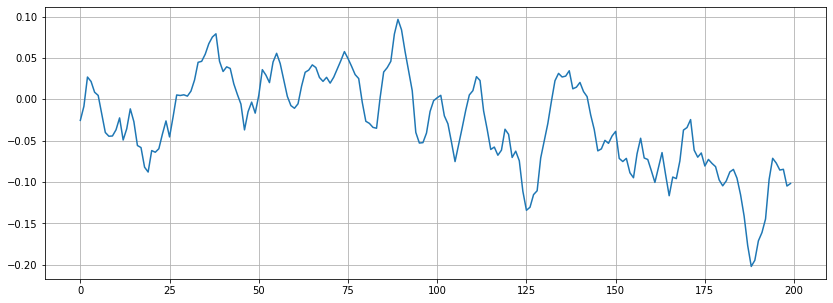

In [13]:
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(b, sr=sampling_rate_b)
# Zooming in
n0 = 9000
n1 = 9200
plt.figure(figsize=(14, 5))
plt.plot(b[n0:n1])
plt.grid()

In [14]:
zero_crossings = librosa.zero_crossings(b[n0:n1], pad=False)
print(sum(zero_crossings))

16


### MFCC

(20, 287)


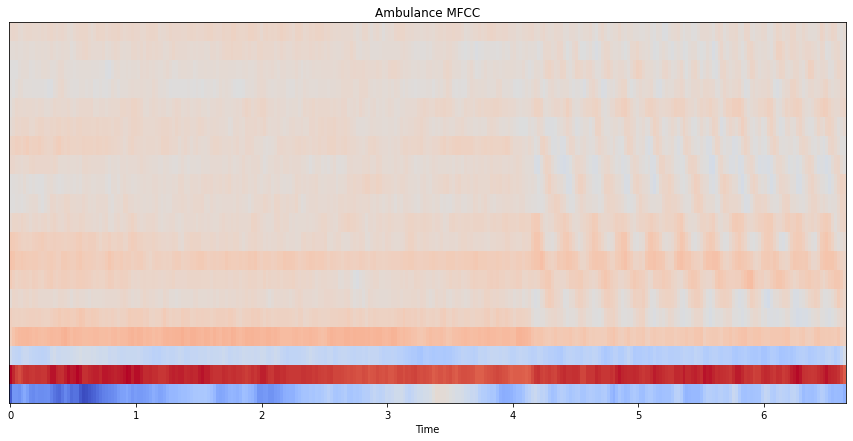

In [15]:
mfccs = librosa.feature.mfcc(y=a, sr=sampling_rate_a)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sampling_rate_a, x_axis='time')
plt.title('Ambulance MFCC')
plt.show()

(20, 300)


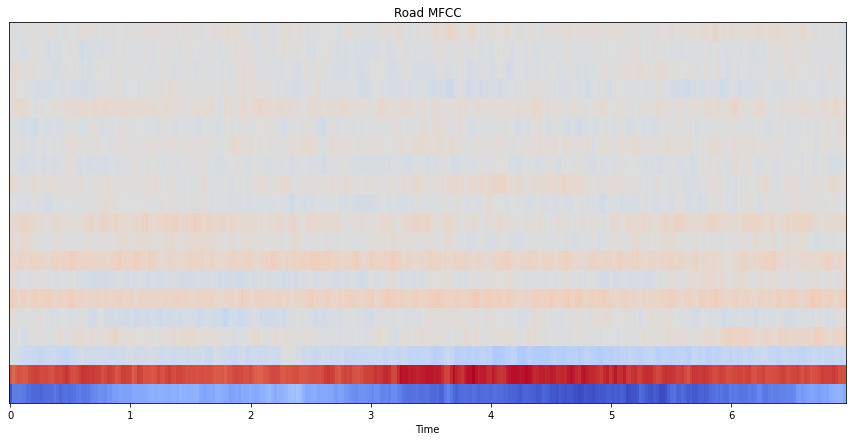

In [16]:
mfccs = librosa.feature.mfcc(y=b, sr=sampling_rate_b)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sampling_rate_b, x_axis='time')
plt.title('Road MFCC')
plt.show()

MFCC describes the overall shape of the spectral envelope. We can see the ambulance pattern again at 4 secods. 

### Chroma

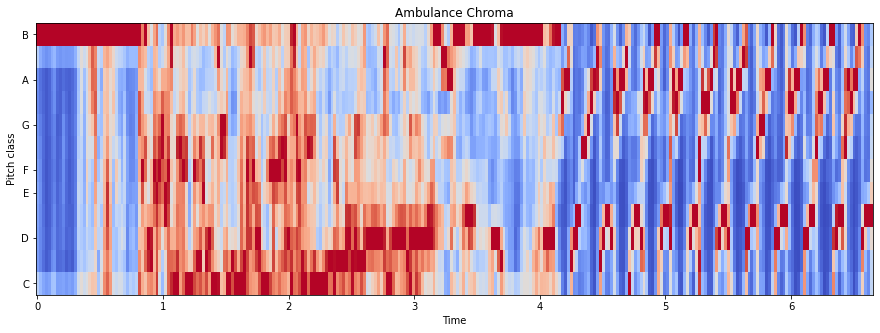

In [17]:
chromagram = librosa.feature.chroma_stft(y=a, sr=sampling_rate_a)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.title('Ambulance Chroma')
plt.show()

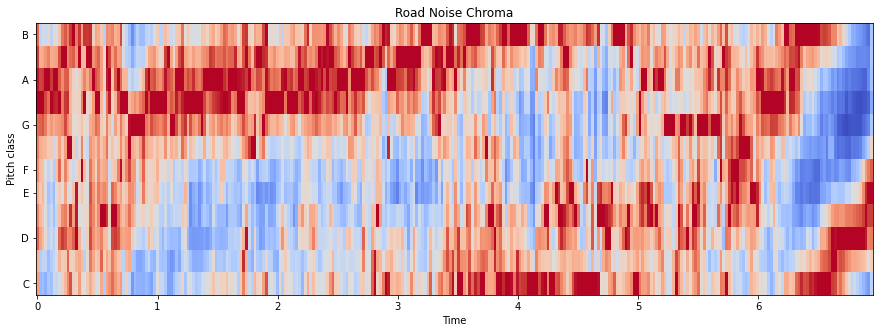

In [18]:
chromagram = librosa.feature.chroma_stft(y=b, sr=sampling_rate_b)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.title('Road Noise Chroma')
plt.show()

A chroma feature represents energy of each pitch class is present in the signal. Road noises chroma's pitches are a bit all over the place while ambulance signal dominates once it starts at 4 seconds. 